In [2]:
import numpy as np
import pandas as pd

from scipy import stats
import statsmodels.api as sm
import statsmodels
from statsmodels.stats import weightstats as stests

import seaborn as sns
import matplotlib.pyplot as plt

## Загрузим данные

In [6]:
data = pd.read_csv('hw2_1.csv', sep=';', index_col=0)
data.head()

,date,deviceCategory,sourceMedium,experimentVariant,clickButtonOnMain,sessionDuration
1,2019-11-27,desktop,(direct) / (none),control,1,"123,109764978127"
2,2019-11-27,mobile,maz.com / referral,test,1,"135,604000573899"
3,2019-11-27,mobile,(direct) / (none),test,1,"134,451016589043"
4,2019-11-27,desktop,google / organic,test,1,"130,691086592426"
5,2019-11-27,mobile,google / organic,control,1,"117,617311178722"


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2943 entries, 1 to 2943
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   date               2943 non-null   object
 1   deviceCategory     2943 non-null   object
 2   sourceMedium       2943 non-null   object
 3   experimentVariant  2943 non-null   object
 4   clickButtonOnMain  2943 non-null   int64 
 5   sessionDuration    2943 non-null   object
dtypes: int64(1), object(5)
memory usage: 160.9+ KB


#### Изменим тип данных

In [14]:
data['sessionDuration'] = data.sessionDuration.str.replace(',','.').astype('float')

## Гипотеза 1
Есть ли значимое изменение в большую или меньшую сторону у клика на целевую кнопку  (контроль – Check, тест – Find out in 30 seconds)

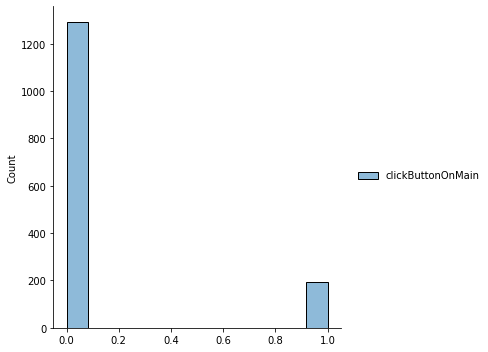

In [31]:
test = data[data['experimentVariant'] == 'test'].clickButtonOnMain
control = data[data['experimentVariant'] == 'control'].clickButtonOnMain

sns.displot([test, control]);

In [19]:
test_sum = test.sum()
control_sum = control.sum()

test_n = test.count()
control_n = control.count()

In [42]:
print('Test ctr.:', test_sum/test_n)
print('Control ctr.:', control_sum/control_n)

Test ctr.: 0.09122085048010974
Control ctr.: 0.1292929292929293


#### Применим z-тест для пропорций

In [35]:
z_stat, p_value = statsmodels.stats.proportion.proportions_ztest([test_sum, control_sum], [test_n, control_n])

print(f'P-Value {p_value}')
'Significant' if p_value < .05 else 'Non Significant'

P-Value 0.0009852325829367897


'Significant'

In [39]:
z_stat, p_value = statsmodels.stats.proportion.proportions_ztest([test_sum, control_sum], [test_n, control_n], alternative='larger')

print(f'P-Value {p_value}')
'Significant' if p_value < .05 else 'Non Significant'

P-Value 0.9995073837085316


'Non Significant'

In [40]:
z_stat, p_value = statsmodels.stats.proportion.proportions_ztest([test_sum, control_sum], [test_n, control_n], alternative='smaller')

print(f'P-Value {p_value}')
'Significant' if p_value < .05 else 'Non Significant'

P-Value 0.0004926162914683949


'Significant'

#### Рассчитаем доверительный интервал

In [ ]:
statsmodels.stats.proportion.confint_proportions_2indep(
    count1 = test_sum,
    nobs1 = test_n,
    count2 = control_sum, 
    nobs2 = control_n
)

(-0.060728408827443695, -0.015453776655158905)

#### Вывод
 - P-Value значительное ниже 0.05. Соответственно, мы имеем право отвергнуть нулевую гипотезу и сделать  заключение, что разница в конверсии в целевую кнопку между группами статистичеки значима
 - Также видна разница между группами по доверительному интервалу (так как интервал не пересекает ноль)
 - Ctr в контрольной группе выше. Рельльтаты котрольной группы статистически значимо лучше
     - Также быи проведены одностороние тесты для проверки, которые также показали, что контроль стат. значимо выше теста

## Гипотеза 2
Изменилось ли время проведенное на сайте в рамках сеанса

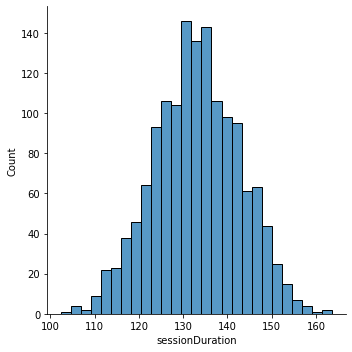

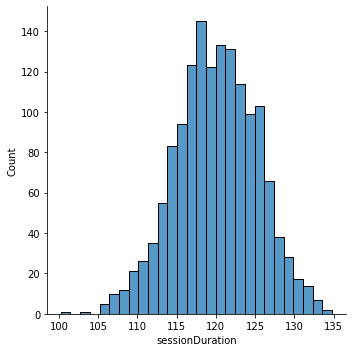

In [46]:
test = data[data['experimentVariant'] == 'test'].sessionDuration
control = data[data['experimentVariant'] == 'control'].sessionDuration

sns.displot(test);
sns.displot(control);

In [47]:
print('Test mean:', test.mean())
print('Control mean:', control.mean())

Test mean: 133.05922272430425
Control mean: 120.03803959554634


In [50]:
t_stat, p_value = stats.ttest_ind(test, control)

print(f'P-Value {p_value}')
'Significant' if p_value < .05 else 'Non Significant'

P-Value 0.0


'Significant'

In [59]:
t_stat, p_value = stats.ttest_ind(test, control, alternative='greater')

print(f'P-Value {p_value}')
'Significant' if p_value < .05 else 'Non Significant'

P-Value 0.0


'Significant'

#### Ввывод
- P-Value ниже 0.05. Соответственно, мы имеем право отвергнуть нулевую гипотезу и сделать  заключение, что разница длительности сессий между группами статистичеки значима
- Пользователи из тестовой группы провели в среднем больше времени на сайте
    - Результат одностороннего теста подтверждает, что эта разница статистически значима